In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib
from pylab import *
import random
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#GERAR DADOS
M = 1000

minMaxScaler = MinMaxScaler()

#CONJUNTO 1 - TREINAMENTO
xa = np.random.randn(M,1) #gerando um vetor coluna de 1000 linhas com valores de uma distribuição normal de média 0 e variancia 1
xb = 10*np.random.randn(M,1) + 10 #gerando um vetor coluna de 1000 linhas com valores de uma distribuição normal de média 10 e variancia 100
y1 = xa + xb

#CONCATENAR xa E xb
X1 = np.c_[xa,xb]

#PADRONIZAÇÃO DE X1
scaled_X1 = minMaxScaler.fit_transform(X1)

#CONJUNTO 2 - VALIDACAO
x1 = np.random.randn(M,1)
x2 = 10*np.random.randn(M,1) + 10
y2 = x1 + x2

#CONCATENAR x1 E x2
X2 = np.c_[x1,x2]

#PADRONIZAÇÃO DE X2
scaled_X2 = minMaxScaler.fit_transform(X2)

#PADRONIZAÇÃO DE Y1
scaled_Y1 = minMaxScaler.fit_transform(y1)

#PADRONIZAÇÃO DE Y2
scaled_Y2 = minMaxScaler.fit_transform(y2)

In [3]:
#GERANDO VALORES PARA PARAMETROS
N = 500
a1 = np.linspace(-20.0, 20.0, N) #gerando N valores entre -20 e 20 regularmente espaçados
a2 = np.linspace(-20.0, 20.0, N) #gerando N valores entre -20 e 20 regularmente espaçados

A1, A2 = np.meshgrid(a1, a2) #criando o meshgrid

#GERANDO DADOS PARA PLOTAR A FUNÇÃO DE CUSTO
J = np.zeros ((N,N)) #Matriz N por N de zeros
for iter1 in range (0,N):
    for iter2 in range (0,N):
        yhat = A1[iter1][iter2]*scaled_X1[:,0] + A2[iter1][iter2]*scaled_X1[:,1]
        J[iter1][iter2] = (1/M)*np.sum(np.square(scaled_Y1 - yhat))
        
#PLOTANDO O GRAFICO DA FUNÇÃO DE CUSTO
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ADICIONANDO A BARRA DE CORES PARA LEGENDA
fig.colorbar(surf, shrink=0.5, aspect=5)

#ADICIONANDO LABELS E TÍTULO
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig

#MOSTRAR A FIGURA
plt.show()

#SALVAR
plt.savefig("superficie_erro_gd_batelada_exercicio8d_minmax.png", dpi=600)

KeyboardInterrupt: 

In [4]:
#SOLUÇÃO FECHADA
a_opt = np.linalg.pinv(X1.T.dot(X1)).dot(X1.T).dot(y1)

yhat = a_opt[0,0]*xa + a_opt[1,0]*xb

Joptimum = (1/M)*np.sum(np.square(y1 - yhat))

#PRINT
print('a1: %1.4f' %(a_opt[0][0]))
print('a2: %1.4f' %(a_opt[1][0]))

a1: 1.0000
a2: 1.0000


In [5]:
#NUMERO DE ITERACOES
N_iterations = 2000

#PASSO DE APRENDIZAGEM
eta = 0.005 #TIVE UM PROBLEMA QUE NÃO CONSEGUI DEPURAR QUANTO TROCAVA O PASSO DE APRENDIZAGEM

#INICIALIZAÇÃO DOS PARÂMETROS
a = np.zeros((2,1)) #vetor coluna de parâmetros inicializados com 0
a[0] = -20 #Atribuição de valor inicial para o passo de aprendizagem
a[1] = -20

#CRIANDO DADOS HISTÓRICOS
a_hist = np.zeros((2,N_iterations + 1))
J_hist = np.zeros(N_iterations + 1)
a_hist[0,0] = a[0]
a_hist[1,0] = a[1]
y_hip = a_hist[0,0]*scaled_X1[:,0] + a_hist[1,0]*scaled_X1[:,1]
J_hist[0] = (1/M)*np.sum (np.square(scaled_Y1 - y_hip))

#BATELADA ENQUANTO ERRO > 0.001 E NÃO ALCANÇOU NÚMERO MÁXIMO DE ITERAÇÕES
error = 1
iteration = 0
while (error > 0.001 and iteration < N_iterations-1):
    gradients = (-2/M) * scaled_X1.T.dot(scaled_Y1 - scaled_X1.dot(a))
    a = a - eta * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    y_hip = a[0]*scaled_X1[:,0] +a[1]*scaled_X2[:,1]
    J_hist[iteration+1] = (1/M)*sum(np.square(scaled_Y1 - y_hip))
    error = np.abs(J_hist[iteration+1] - J_hist[iteration])
    iteration = iteration + 1

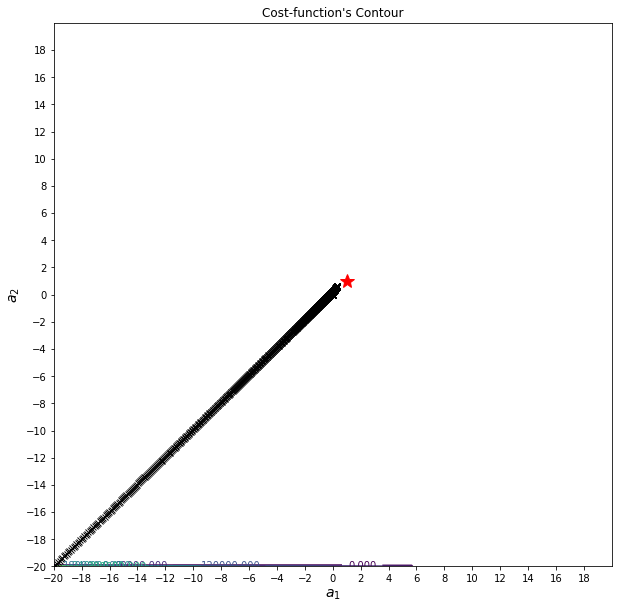

<Figure size 432x288 with 0 Axes>

In [6]:
#PLOTAR CURVA DE NÍVEL
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)

#ADICIONANDO LABELS E TÍTULO
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

#ADICIONANDO MARCADORES DE PARÂMETROS
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)

#ARRUMANDO OS INTERVALOS
plt.xticks(np.arange(-20, 20, step=2.0))
plt.yticks(np.arange(-20, 20, step=2.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("grafico_contorno_gd_batelada_exercicio8d_minmax.png", dpi=600)

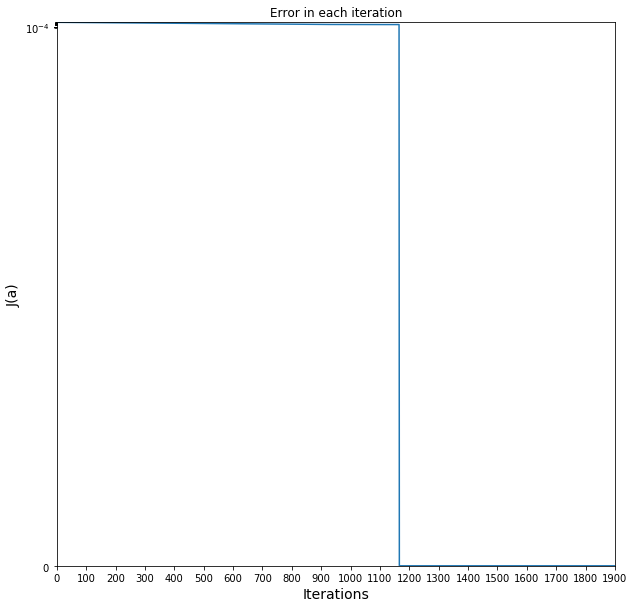

<Figure size 432x288 with 0 Axes>

In [8]:
#PLOTANDO O GRAFICO DO ERRO PARA CADA ITERAÇÃO
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, N_iterations+1), J_hist)

#ADICIONANDO LABELS E TÍTULO
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(a)', fontsize=14)
plt.title('Error in each iteration')

#ARRUMANDO OS INTERVALOS
plt.xlim(0, iteration)
plt.yscale('log')
plt.xticks(np.arange(0, 2000, step=100.0))
plt.yticks(np.arange(0, 0.001, step=0.0001))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("erro_iteracao_gd_batelada_exercicio8d_minmax.png", dpi=600)